In [115]:
import numpy as np 
import torch 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [116]:
class plot_error_surface(object):
  def __init__(self , w_range ,b_range , X ,y ,n_samples=30 , go=True):
    W =np.linspace(-w_range ,w_range ,n_samples)
    B =np.linspace(-b_range ,b_range ,n_samples)
    w ,b =np.meshgrid(W,B)
    Z = np.zeros((30,30))
    self.y = y.numpy()
    self.x = X.numpy()
    count = 0


    for w1 ,b1 in zip(w,b):
      count_2=0
      for w2,b2 in zip(w1,b1):
        Z[count,count_2] = np.mean((self.y - self.x*w2+b2)**2)
        count_2+=1
      count+=1 
    self.w =w
    self.b =b
    self.z =Z
    self.B =[]
    self.W =[]
    self.LOOS=[]
    self.n =0
    if go==True :
      plt.figure()
      plt.figure(figsize=(7.5,5))
      plt.axes(projection ='3d').plot_surface(self.w , self.b ,self.z ,rstride=1 ,cstride=1 , cmap='viridis' ,edgecolor='none')
      plt.title('Cost/Total Loss Surface')
      plt.xlabel('w')
      plt.ylabel('b')
      plt.show()
      plt.title('Cost/Total Loss Surface Contour')
      plt.xlabel('w')
      plt.ylabel('b')
      plt.contour(self.w , self.b ,self.z)
      plt.show()
  ###################################
  def set_params(self ,W,B,Loss):
    self.n+=1
    self.B.append(B)
    self.W.append(W)
    self.LOOS.append(Loss)
  ##################################

  def final_plot(self):
    ax = plt.axes(projection ='3d')
    ax.plot_wireframe(self.w , self.b , self.z)
    ax.scatter(self.W ,self.B , self.LOOS , c='r' , marker ='x' ,s=200 , alpha=1)
    plt.figure()
    plt.contour(self.w , self.b  , self.z)
    plt.scatter(self.W , self.B , marker='x' ,c='r')
    plt.xlabel('w')
    plt.ylabel('b')
    plt.show()
  ############################
  ## this function plot iteration ##
  def plot_iter(self):
    plt.figure()
    plt.subplot(121)
    plt.ylim
    plt.plot(self.x , self.y ,'ro' , label='training point')
    plt.plot(self.x , self.W[-1]*self.x+self.B[-1] , label='estimated line')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.ylim((-10,15))
    plt.title('data space iteration '+str(self.n +1))
    plt.figure()
    plt.subplot(121)
    plt.contour(self.w ,self.b , self.z)
    plt.scatter(self.W ,self.B , c='r' , marker='x')
    plt.title('totla loss contour iteration '+str(self.n+1))
    plt.xlabel('w')
    plt.ylabel('b')
    plt.show()


<Figure size 432x288 with 0 Axes>

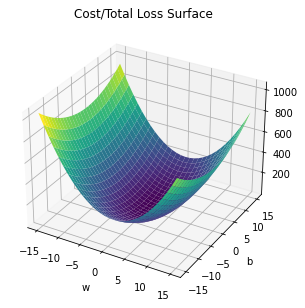

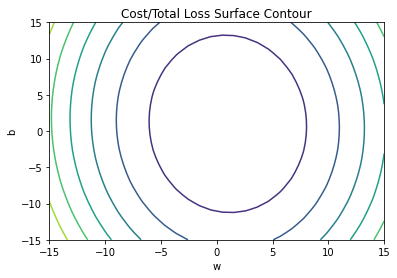

In [117]:
X = torch.arange(-3,3,0.1).view(-1,1) 
f= 1*X-1
y = f+ 0.1* torch.randn(X.size())
w= 15
b= 15 
n_samples =30


surface = plot_error_surface(w,b,X,y,n_samples)


In [118]:
### creat Functions for calculate h_hate and loss 

def forward(x):
  return w*x+b

def ceriterion(y_hat , y):
  return torch.mean((y_hat-y)**2)


In [119]:
## train our data and test our functions 
Loss=[]
def train(X ,y ,w,b , epochs , lr):
  for epoch in range(epochs):
    y_hat = forward(X)
    loss = ceriterion(y_hat ,y)

    surface.set_params(w.data.tolist() , b.data.tolist() ,loss.data.tolist())
    if epoch % 2 ==0:
      surface.plot_iter()
      print('\n\n')
    Loss.append(loss)
    loss.backward()    

    ### update our paramerters 
    w.data = w - lr* w.grad.data
    b.data = b - lr* b.grad.data 

    w.grad.data.zero_()
    b.grad.data.zero_()

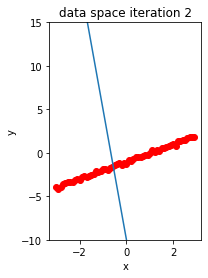

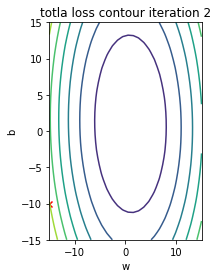

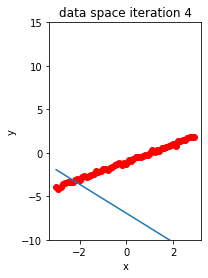

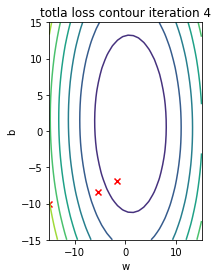

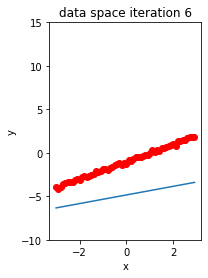

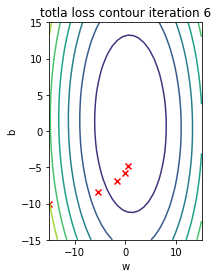

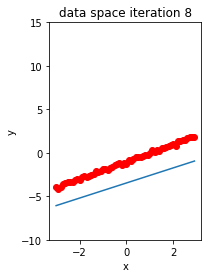

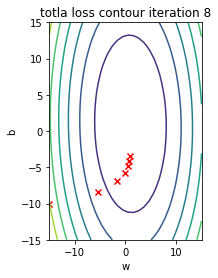

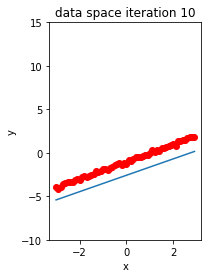

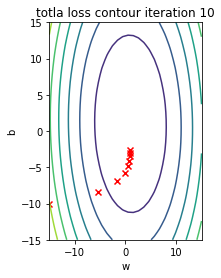

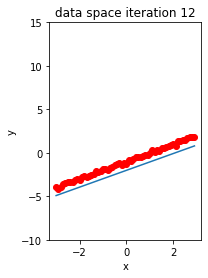

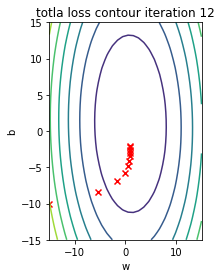

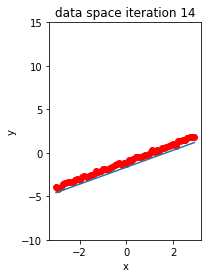

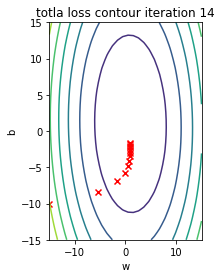

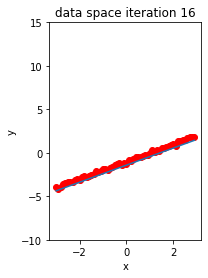

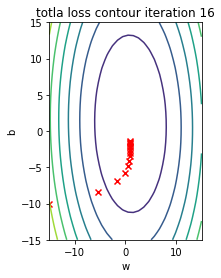

In [120]:
w = torch.tensor(-15.0 ,requires_grad=True)
b = torch.tensor(-10.0 ,requires_grad=True)
epochs =15
lr =0.1

train(X ,y ,w ,b ,epochs ,lr)


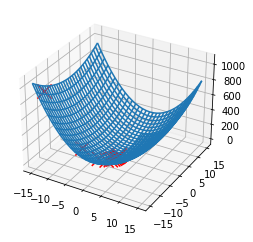

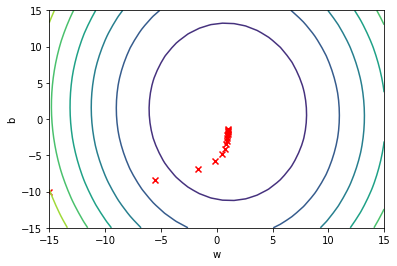

RuntimeError: ignored

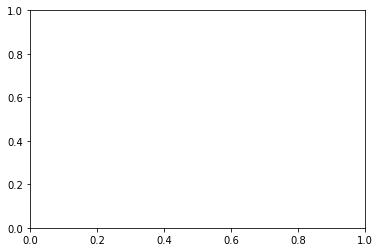

In [124]:
surface.final_plot()
plt.tight_layout()
plt.plot(Loss)
plt.xlabel('iterations')
plt.ylabel('Loss')